In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as plt
%matplotlib inline
import torchvision.utils as vutils
import glob

In [2]:
import sys
sys.path.append('../')
import models
import models.mnist
from data import get_loaders
from utils import DictWrapper

In [3]:
%load_ext autoreload
%autoreload 1

In [4]:
%aimport log_plotter
from log_plotter import get_run_names, get_data, get_data_pth, plot_smooth, plot_tag, plot_runs_and_tags, get_legend, plot_smooth_o1, plot_clusters_online

In [9]:
save_single = False
plt.rcParams.update({'font.size': 12})

In [6]:
save_single = True
plt.rcParams.update({'font.size': 16})

# linreg

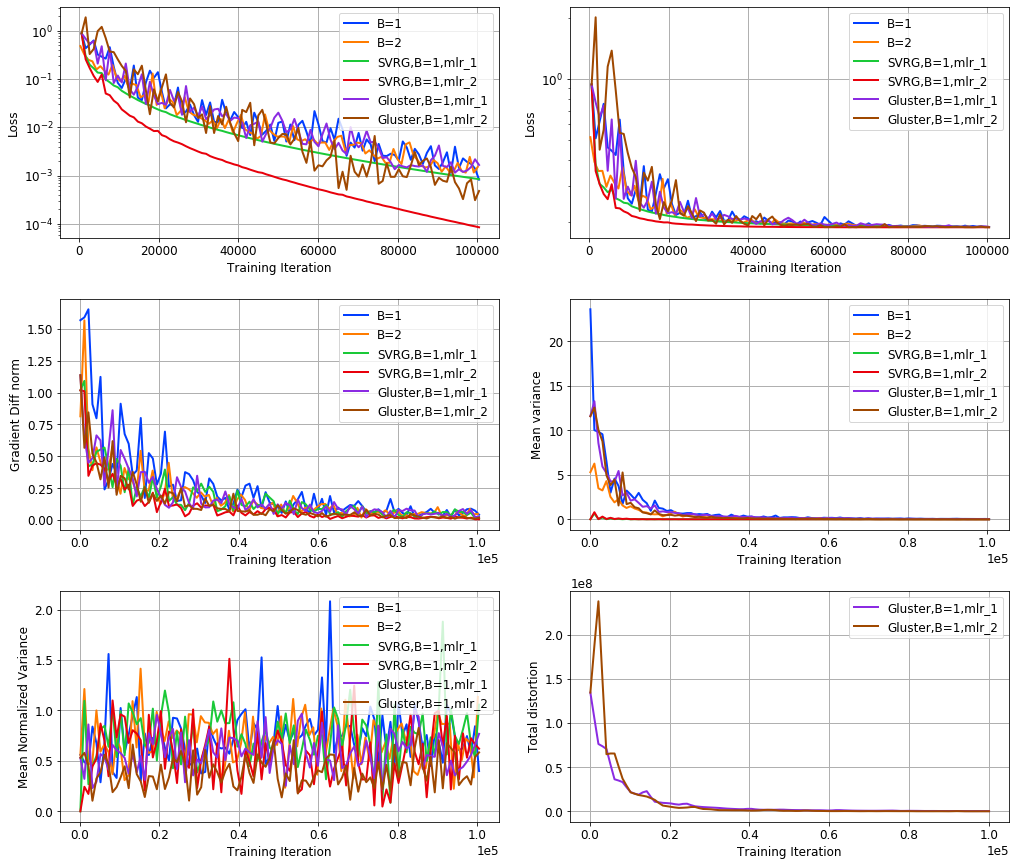

In [20]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_linreg_dim1000_niters1e5/.*seed_123']  # (?!.*scheduler)
tag_names = ['Tloss', 'Vloss', 'grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/linreg.png'
lg_tags = ['sgd,sgd', 'svrg', 'gluster', 'batch_size', 'mlr']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 3e-6], None, None, [98, 100], [98, 100]]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = None
no_title = True
lg_replace = [('sgd,sgd', 'sgd'), ('sgd,', ''), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B=')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

- svrg is always better, of course, it is asymp batch gd
- gluster from one step to another cannot do anything, so B<C is not good in linreg

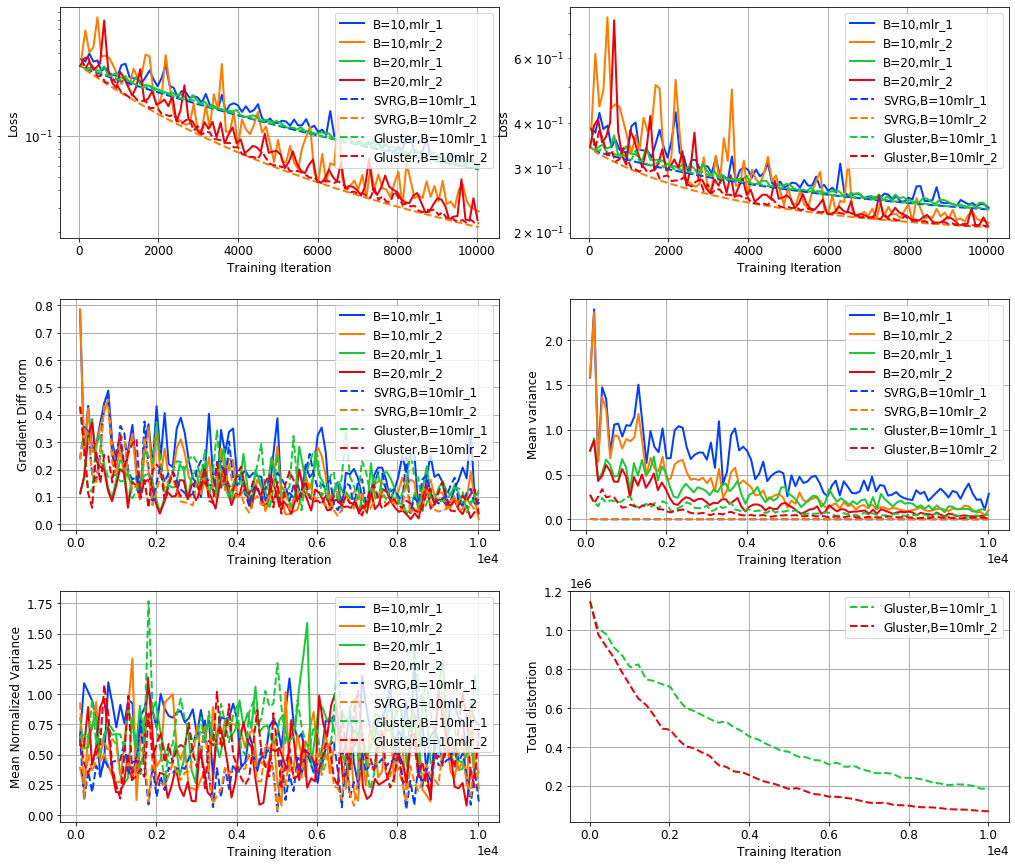

In [27]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_linreg_dim1000_niters1e5_bs10/']  # (?!.*scheduler)
tag_names = ['Tloss', 'Vloss', 'grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/linreg.png'
lg_tags = ['sgd,sgd', 'svrg', 'gluster', 'batch_size', 'mlr']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 3e-6], None, None, [98, 100], [98, 100]]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 4
no_title = True
lg_replace = [('sgd,sgd', 'sgd'), ('sgd,', ''), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B=')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

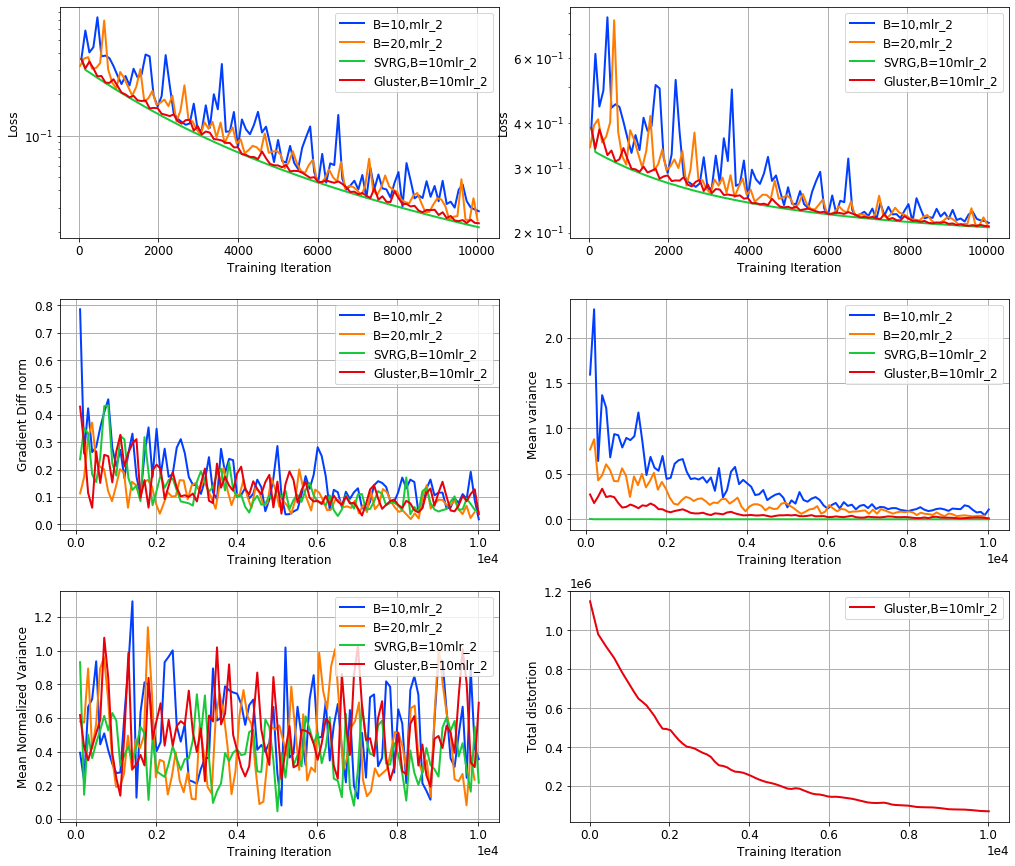

In [29]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_linreg_dim1000_niters1e5_bs10/.*mlr_2']  # (?!.*scheduler)
tag_names = ['Tloss', 'Vloss', 'grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/linreg.png'
lg_tags = ['sgd,sgd', 'svrg', 'gluster', 'batch_size', 'mlr']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 3e-6], None, None, [98, 100], [98, 100]]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 4
no_title = True
lg_replace = [('sgd,sgd', 'sgd'), ('sgd,', ''), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B=')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

- gluster is doing as well as svrg
- lr 2 is just enough, one lr that shows sgd as the edge of blow-up
- variance is low for 2B then gluster then svrg, all good
- distortion goes down, it is batch gluster so everything is good
- let's run it for longer to get to saturation of sgd

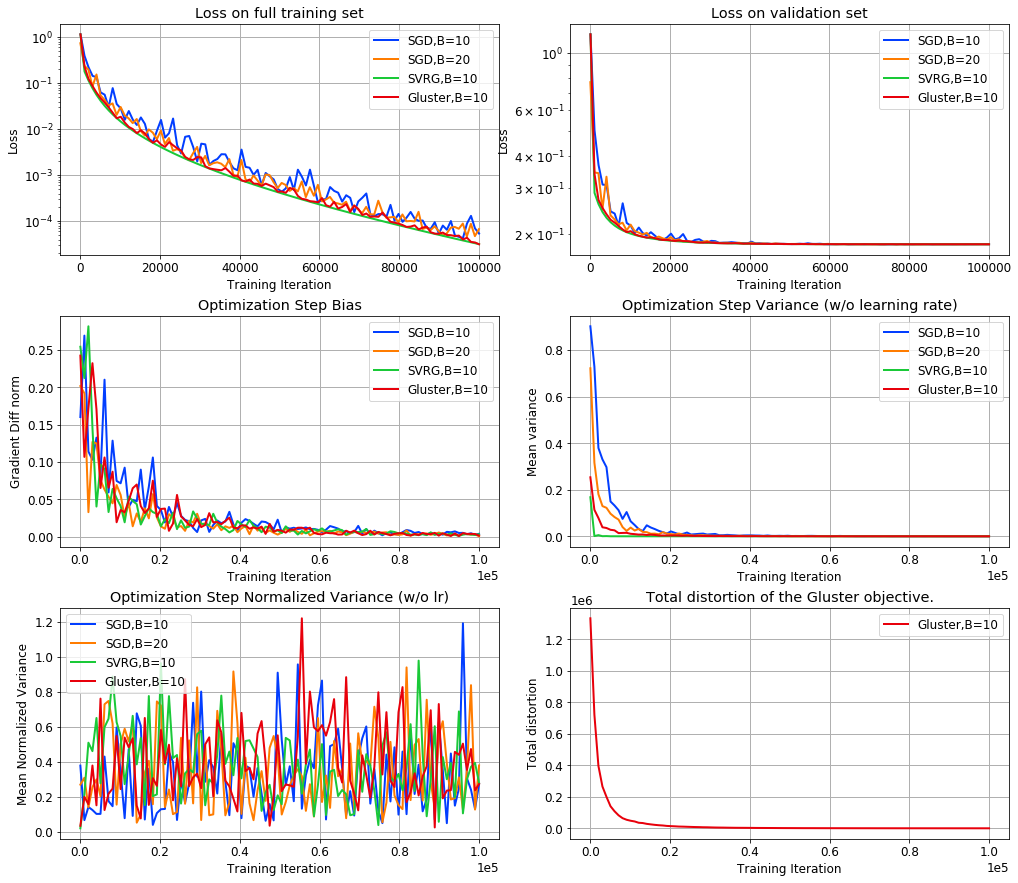

In [36]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_linreg_dim1000_niters1e5_bs10_lr5e-5/']  # (?!.*scheduler)
tag_names = ['Tloss', 'Vloss', 'grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/linreg.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'batch_size']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 3e-6], None, None, [98, 100], [98, 100]]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 4
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B=')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

- batch size 10 is because of gluster, if it were just svrg, batch size 1 also shows its benefit
- current linreg is $w_*^T X + \epsilon$, where $w_*=0$
- for $\gamma>1$ bias is 0 and SGD can overfit to the training data, hence constant decrease we see above
- validation loss does include the bayes risk, it will not go down to zero

# todos
- is this right? batch GD being as good as SGD
- doing transformer has higher priority, if that works it is icml submission, if not, I just need linreg for arxiv
- instead of linreg try rosenbrock
- consider other SNR and $\gamma$, eg. $\gamma<1$, here $\gamma=2$
- try duplicates
- what is the variance of double lr? is it smaller? it should be because the grad is a function of current w and double lr will converge faster, however, after saturation, decreasing lr should decrease the variance.

# Transformer
- write gluster layer for attention
- write data loader that loads from two streams, uniform and stratified sampled data
- estimate the variance
- compute train loss with uniform sampling
- better to modify transformer-xl code directly without using gvar class

This is too much work while I still don't have full answers on mnist/cifar10

https://github.com/kimiyoung/transformer-xl/tree/master/pytorch

https://github.com/fartashf/dmom_code/tree/transformer/transformer

# mnist

## mlp

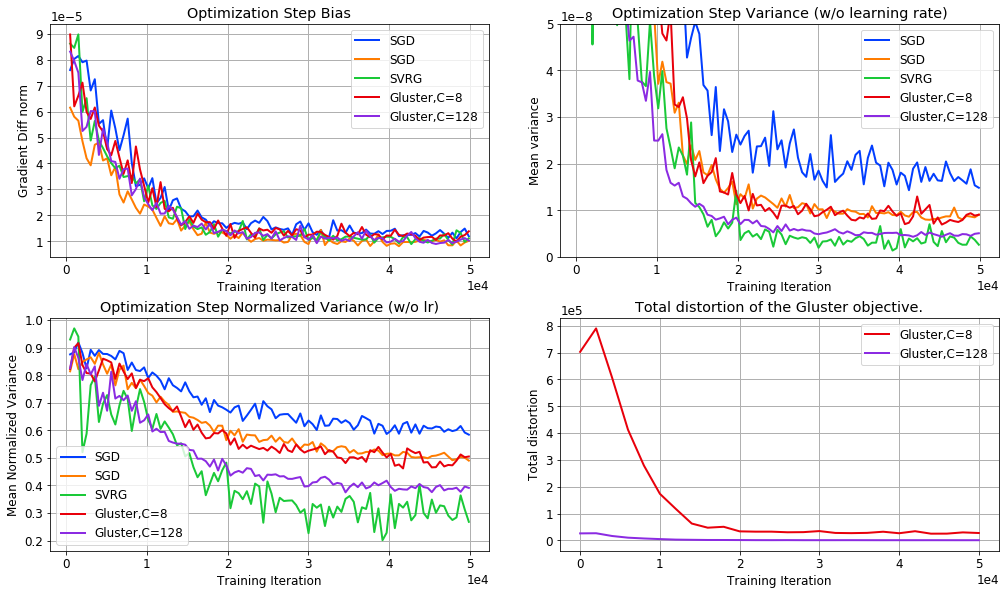

In [68]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_mnist_gvar/.*mlp']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/mnist_mlp.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size']  # g_estim
# ylim = [None]*20
ylim = [None, [0, 5e-8], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

## cnn

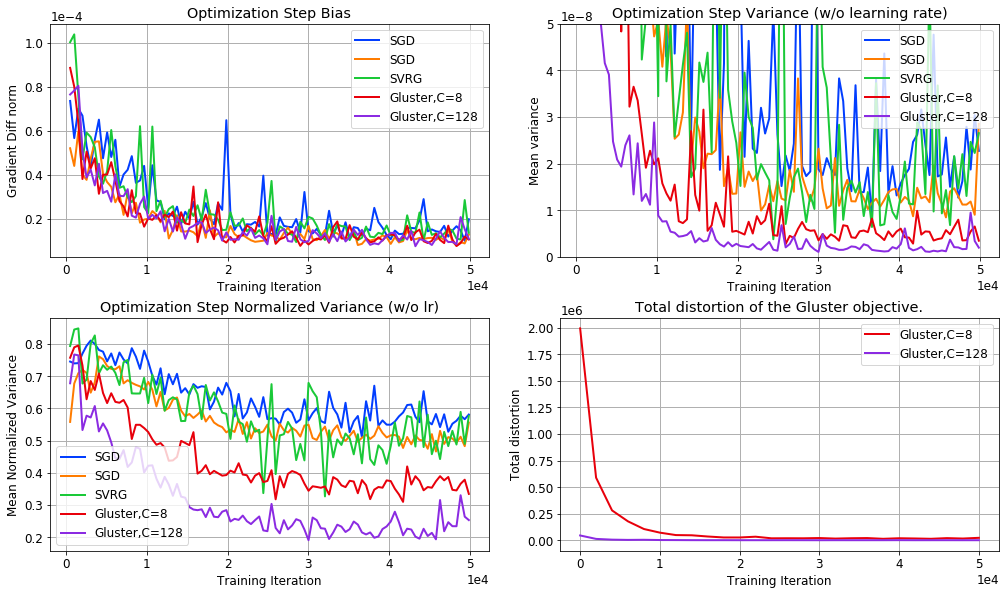

In [69]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_mnist_gvar/.*cnn']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/mnist_cnn.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size']  # g_estim
# ylim = [None]*20
ylim = [None, [0, 5e-8], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

based on var
- on mlp svrg better than supersgd, as good as gluster 128
- on cnn, svrg is not good
all is good news

noise model?
- linreg has decreasing gvar and constant ngvar
- but on mnist we have decreasing ngvar and more noise and more fluctuating gvar

# Cifar10

## resnet8

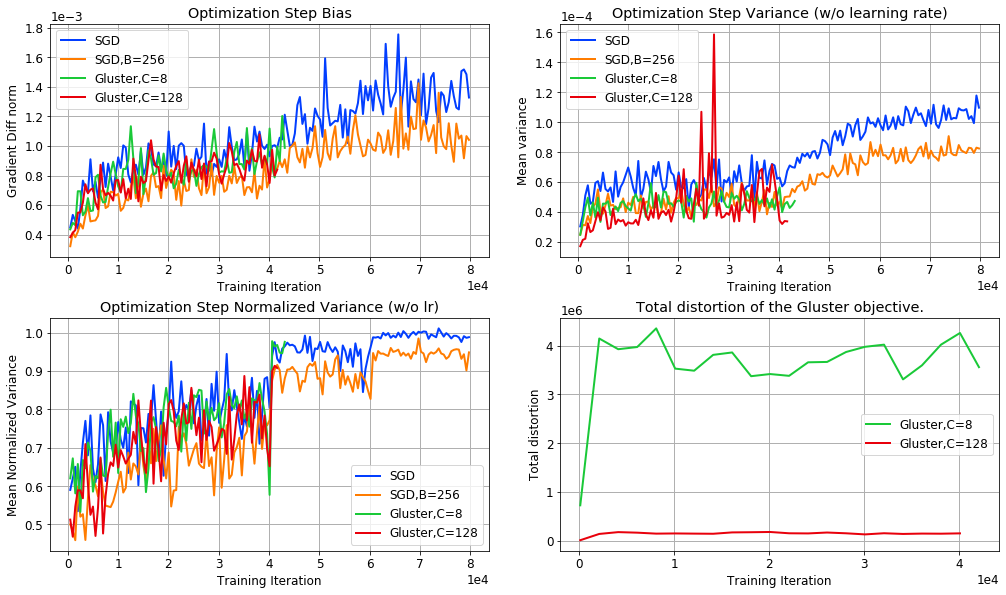

In [87]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar/.*resnet8(?!.*svrg)']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet8.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

## resnet32

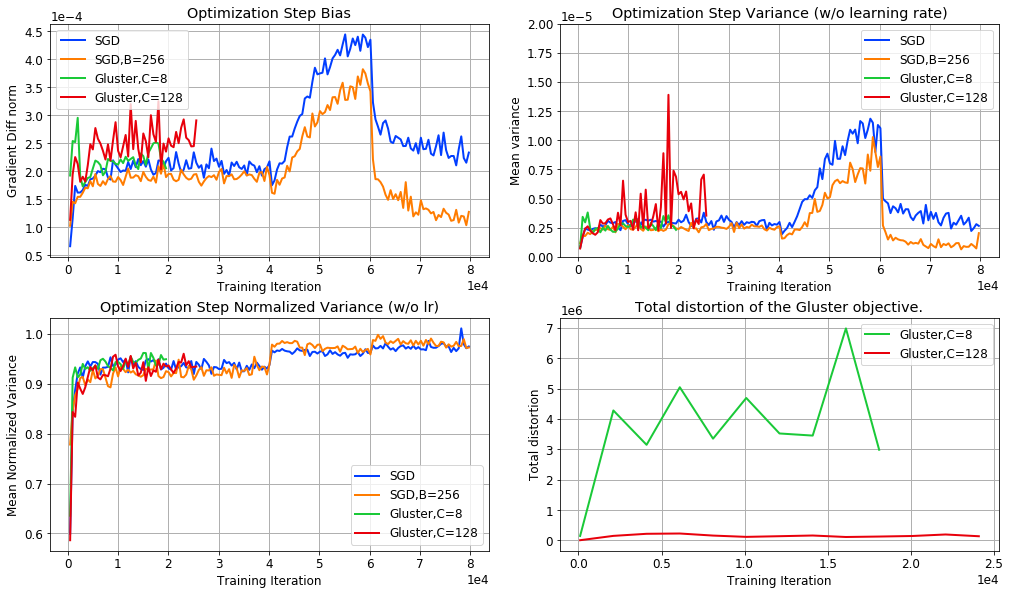

In [80]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar/.*resnet32(?!.*svrg)']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet32.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size']  # g_estim
# ylim = [None]*20
ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

## resnet8 gluster 128 blow up, why?

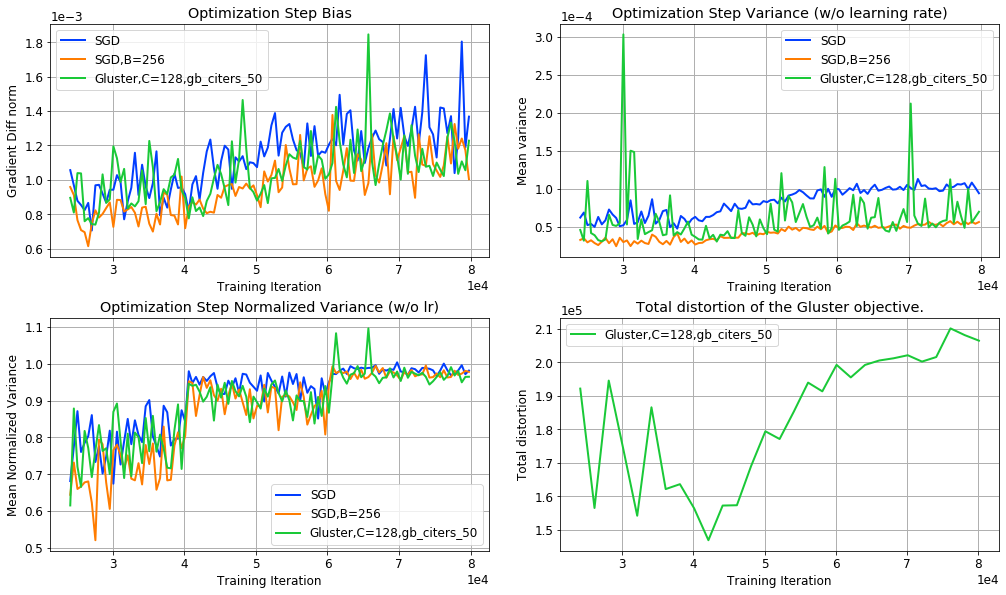

In [109]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_resnet8/(.*resnet8(?!.*svrg|.*gluster)|.*citers_50)']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet8.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'gb_citers']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

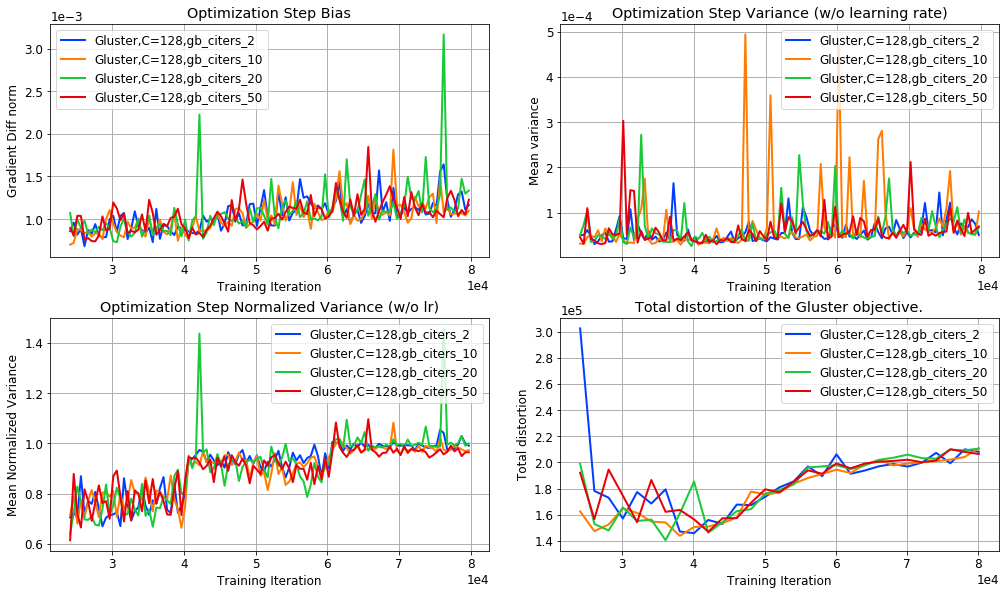

In [107]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_resnet8/.*gluster']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet8.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'gb_citers']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

- cbiters doesn't solve it
- min size? no, min size is already 1
- maybe not use some clusters?
- use smaller nclusters
- C=8 is more stable

* total distortion seems smooth
* maybe our approximations on the gradient are failing for resnet
* no dropout, no batch norm, what else could be the cause?

## cnn

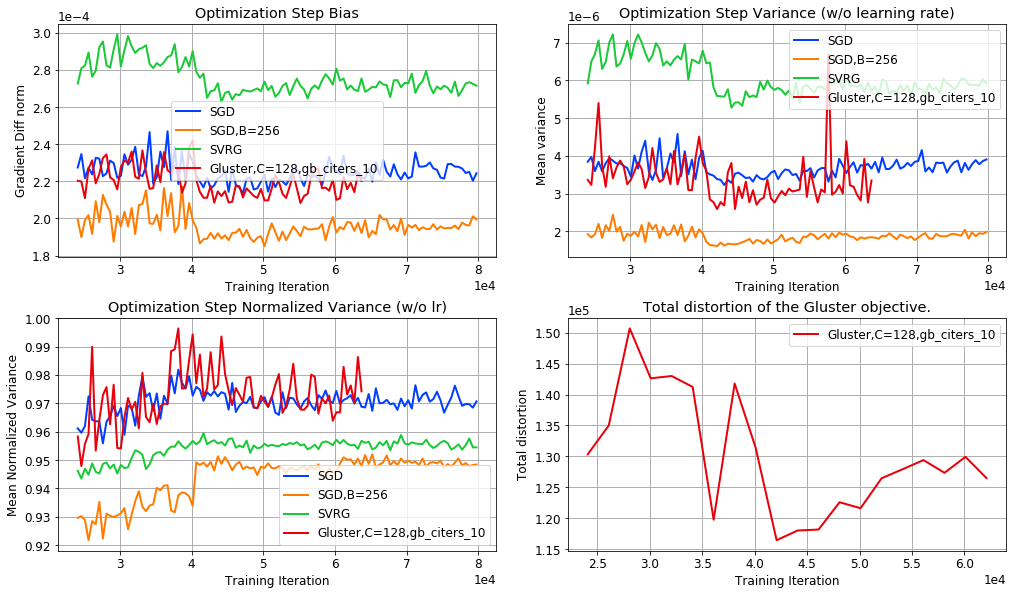

In [128]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_cnn/']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_cnn.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'gb_citers']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

* if all clusters have the same size, there is no difference between uniform sampling and stratified sampling
* so gluster will be the same as sgd if all clusters are about the same size
* WRONG, only if batch size > # clusters, otherwise the example of 2 points
* basically, no guarantee that gluster will be better than sgd, especially if indep gradients

* we still have the question about unstability, especially in resnet
* it's not that the clustering is wrong, because on average the variance is not high
* it is the instability, which means the clustering needs to be more stable to the changes to model params

ideas:
    * perturb params for cluster
    * use moving average of params

## wnoise

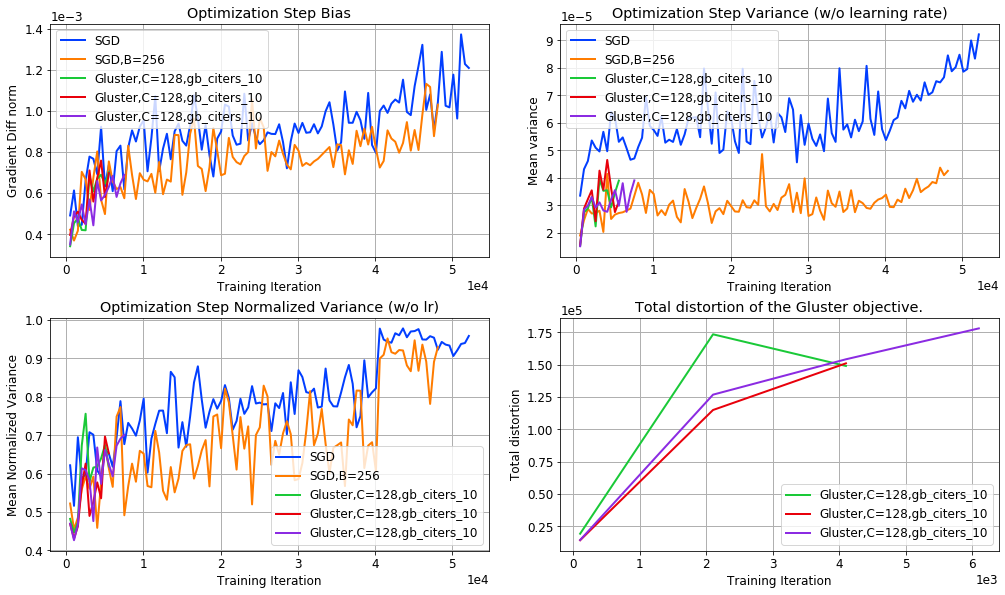

In [136]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_resnet8_wnoise/']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet8_wnoise.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'gb_citers']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

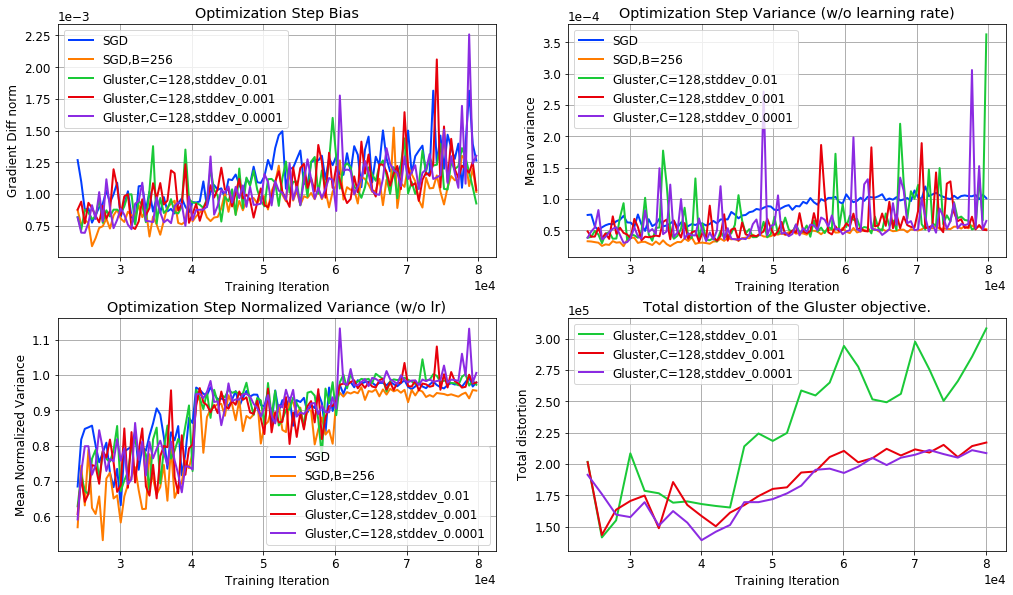

In [150]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_resnet8_wnoise2/']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet8_wnoise.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'stddev']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

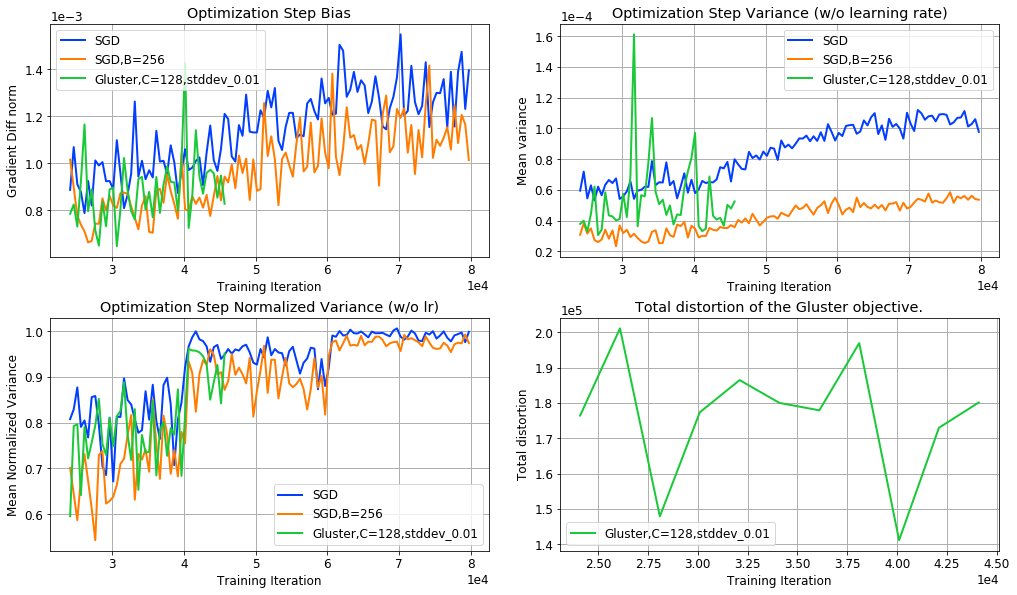

In [178]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_resnet8_wnoise3/(00|01|.*dev_0.01)']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet8_wnoise.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'stddev']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

* simple weight perturb doesn't work
* if model averaging doesn't work, we roughly know the problem in cifar10
* we can move to transformers in the hope that we get a better setting there

## gavg

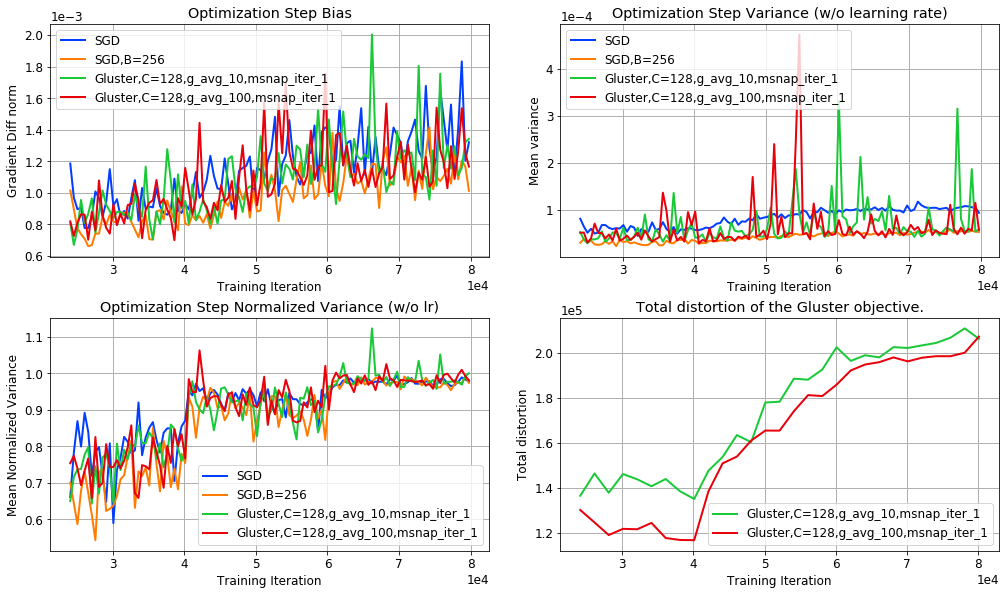

In [173]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_resnet8_gavg/(00|01|02|04)']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet8_gavg.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

* looks like gavg=100, msnap 1 is getting better, so large but recent gavg seems to be good
* larger gavg with msnap=1?

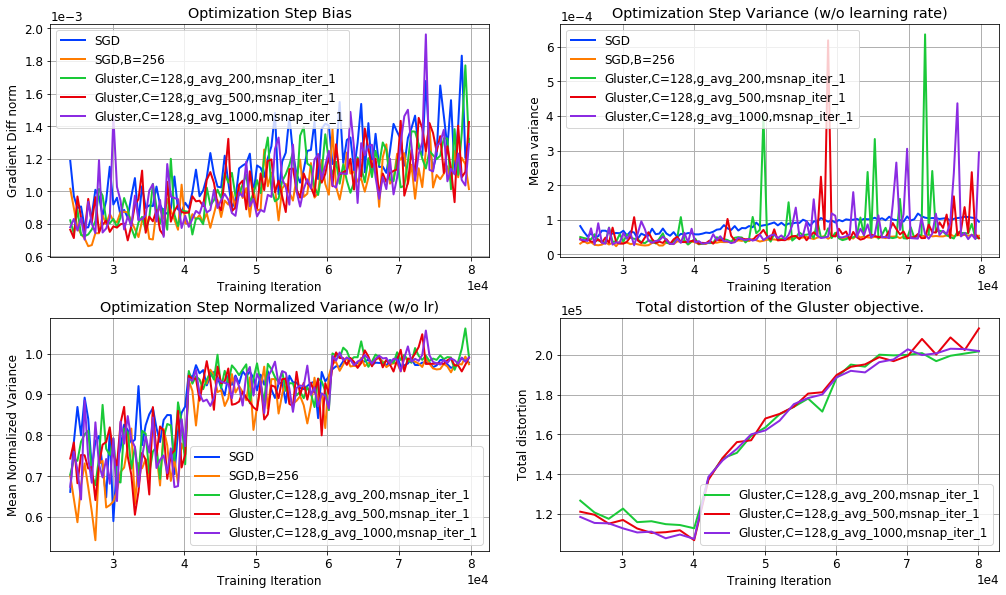

In [170]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_resnet8_gavg/(00|01|06|07|08)']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet8_gavg.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

* gavg is being used but doesn't seem to have too much help, maybe only gavg=100

## gclip, gavg

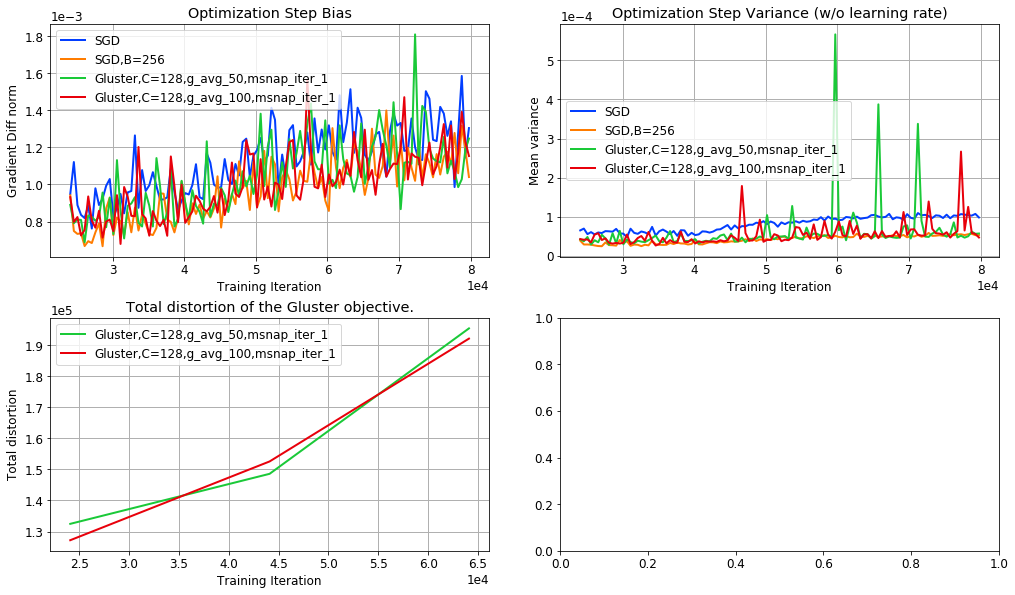

In [184]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_resnet8_gavg_gclip/']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet8_gavg_gclip.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

* any other trick?
* only the variance goes up, it is always unbiased
* explanation: some bad state happens, we cannot prevent it using any trivial tricks
* causes: not batchnorm, not dropout, not model arch, probably only data
* try transformer

* if it is a data problem, do data transformation, see if the behaviour changes
* duplicates in cifar10
* data augmentation
* training subset

## data

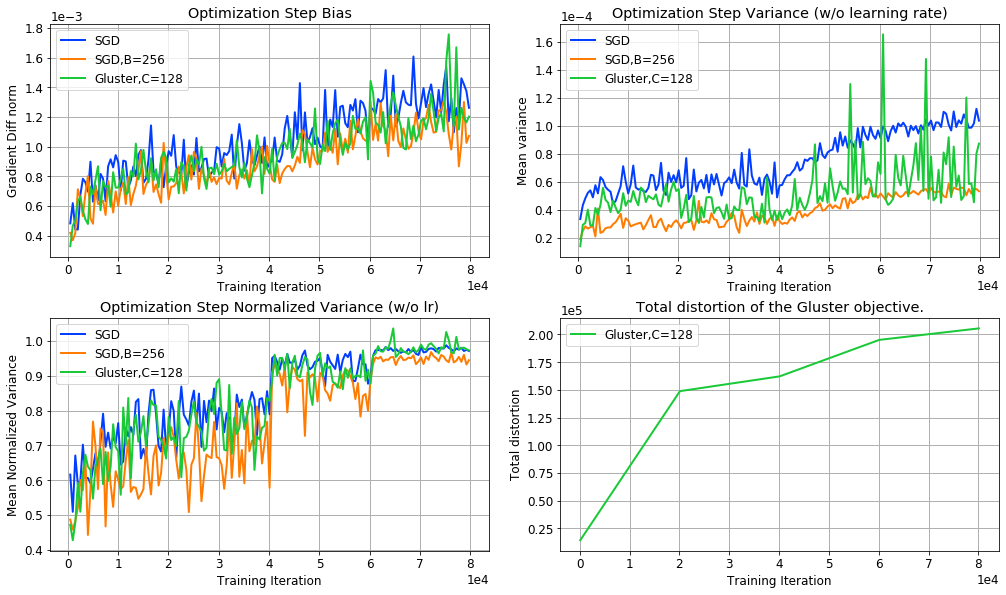

In [209]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_resnet8_data/.*smoothing']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet8_data.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

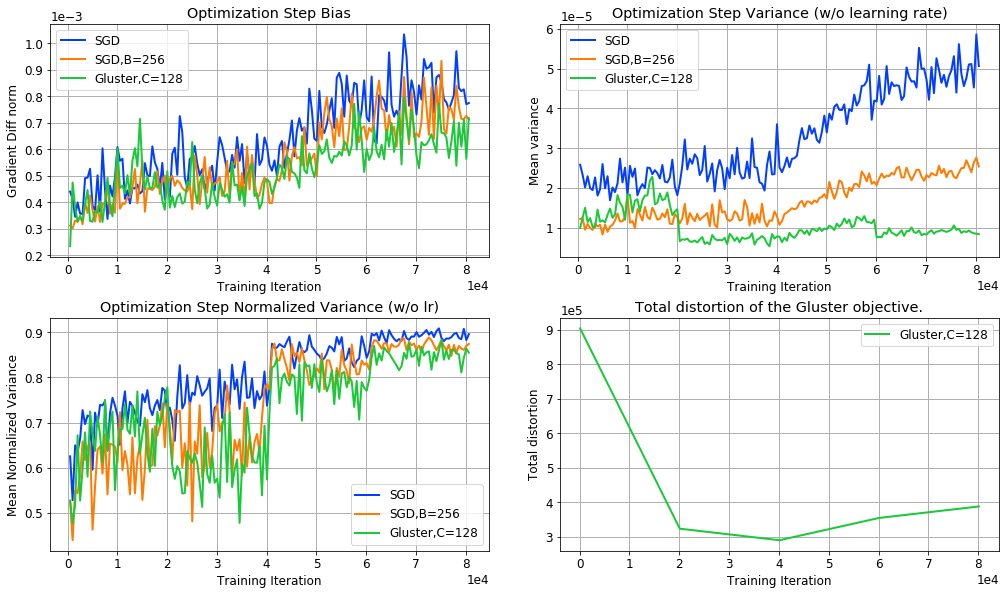

In [210]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_resnet8_data/.*duplicate']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet8_data.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

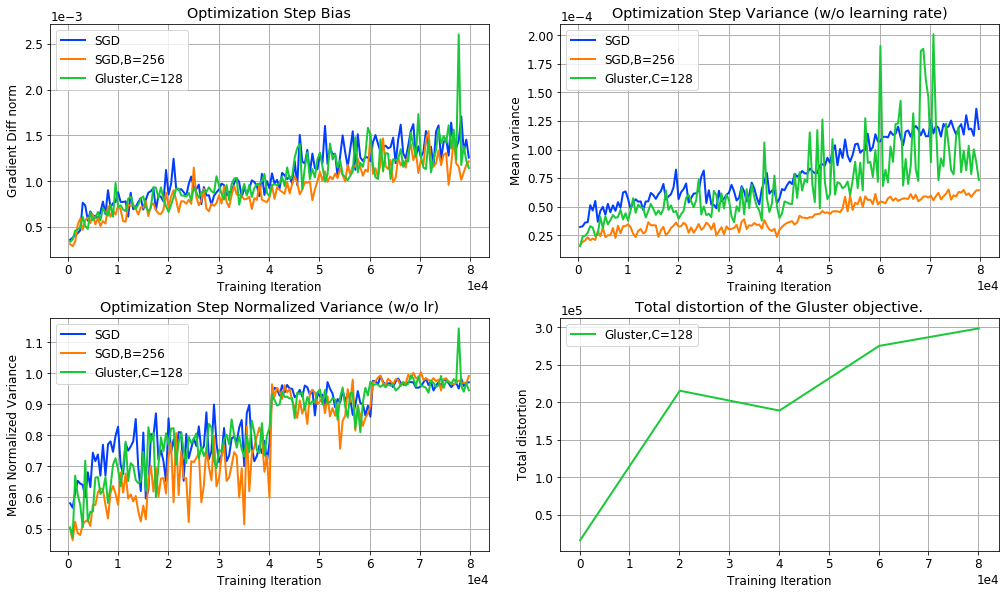

In [211]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_resnet8_data/.*aug']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet8_data.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

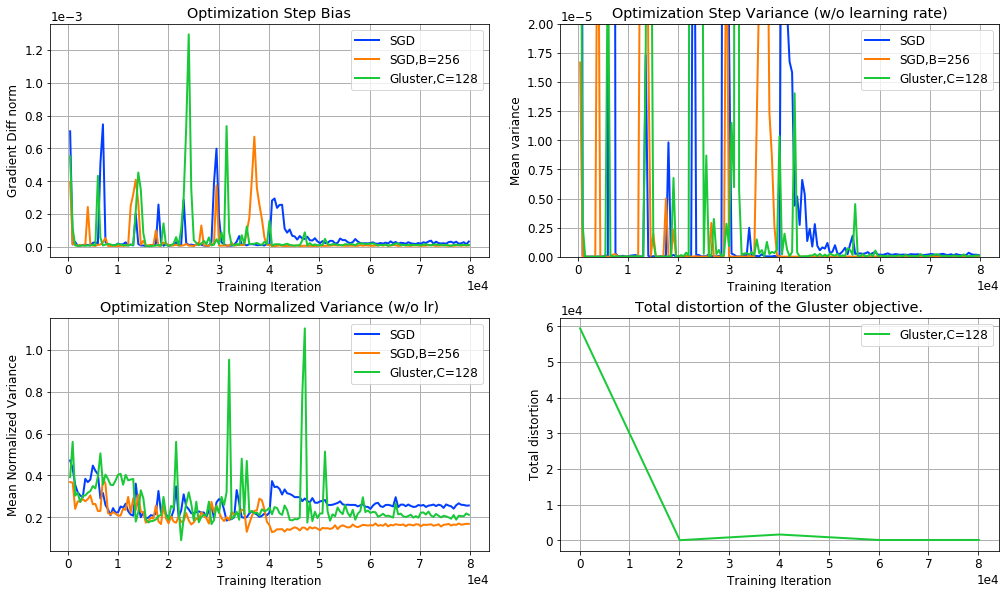

In [212]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_resnet8_data/.*max_train']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet8_data.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter']  # g_estim
# ylim = [None]*20
ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

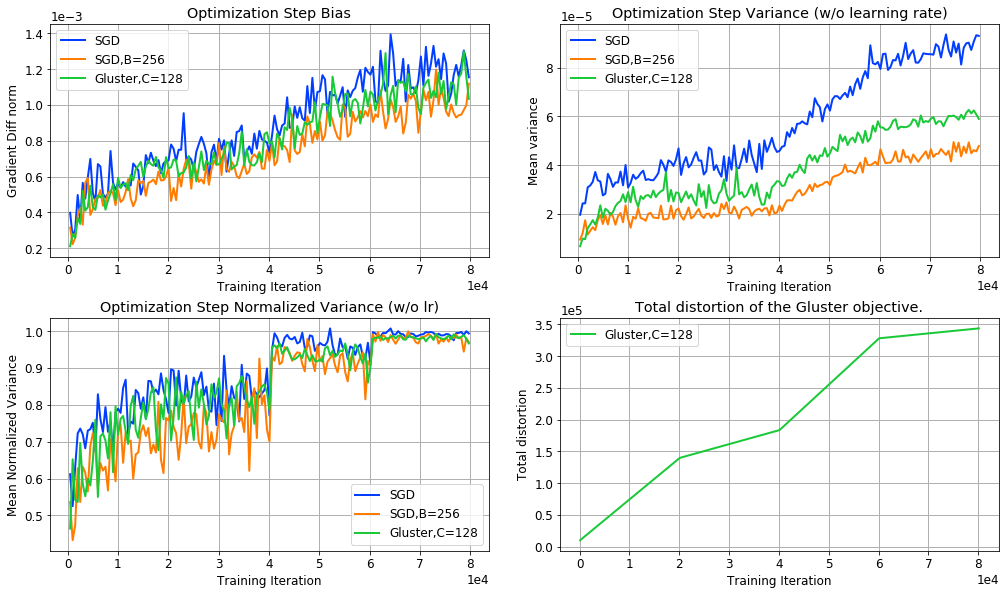

In [213]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_resnet8_data/.*corrupt']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet8_data.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

* it is definitely a data problem


1. label smoothing reduces fluctuations but 0.9 doesn't completely solve it
2. duplicate data is definitely where gluster shines
3. data augmentation also helps but doesn't fully solve
4. max train makes it totally worse
5. corrupt data completely resolves fluctations

* 1, 3, 5: any noisy data helps gluster
* 2, 3, 4: more data is definitely better for both sgd and gluster

hypothesis:
* cifar10 is too small
* there are small noisy data in cifar10 that the model can overfit to, and if the model overfits, gluster provides a bad gradient estimate
* hence any noisy data (label smoothing or corrupt data) dampens that effect
* data augmentation increase the training data and gluster becomes more reliable
* duplicate data is the main example for justifying gluster and it works fine
* small train size is exactly what worsens the fluctuations

Try:
* combinations e.g. label smoothing + corrupt data, label smoothing + data aug
* larger max train set size
* another model (vgg, resnet with batch norm)
* cifar100
* online gluster
* transformer

## other models (resnet32, vgg11)

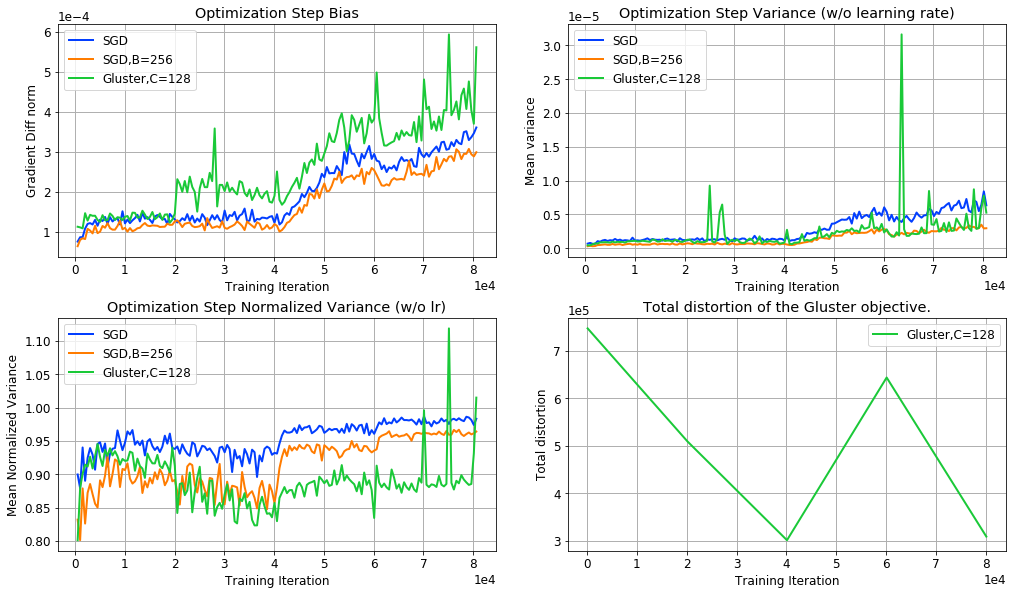

In [215]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_data/.*resnet32.*duplicate']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet32_data.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

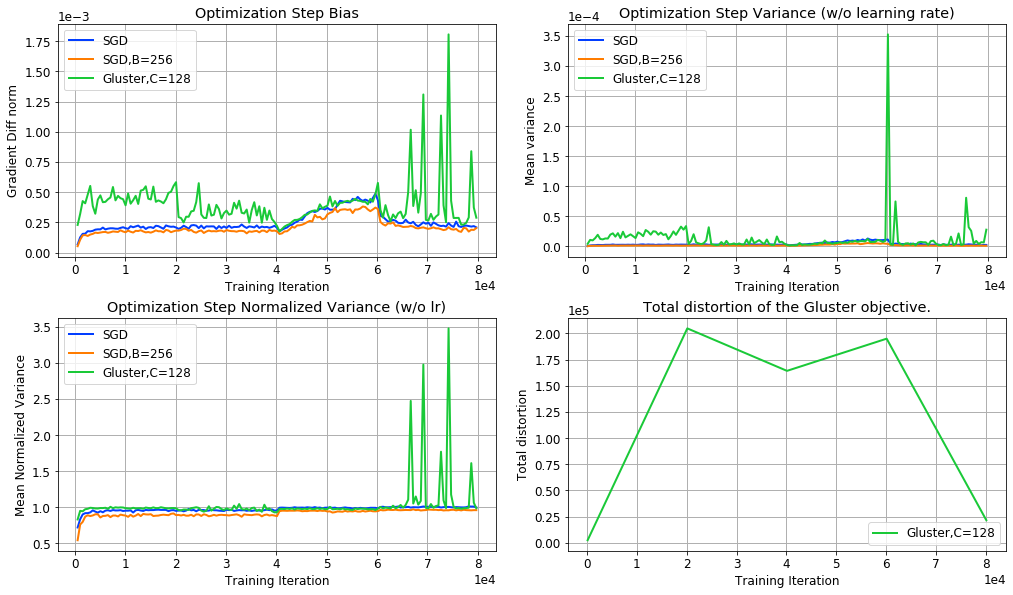

In [216]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_data/.*resnet32.*label_smoothing']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet32_data.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

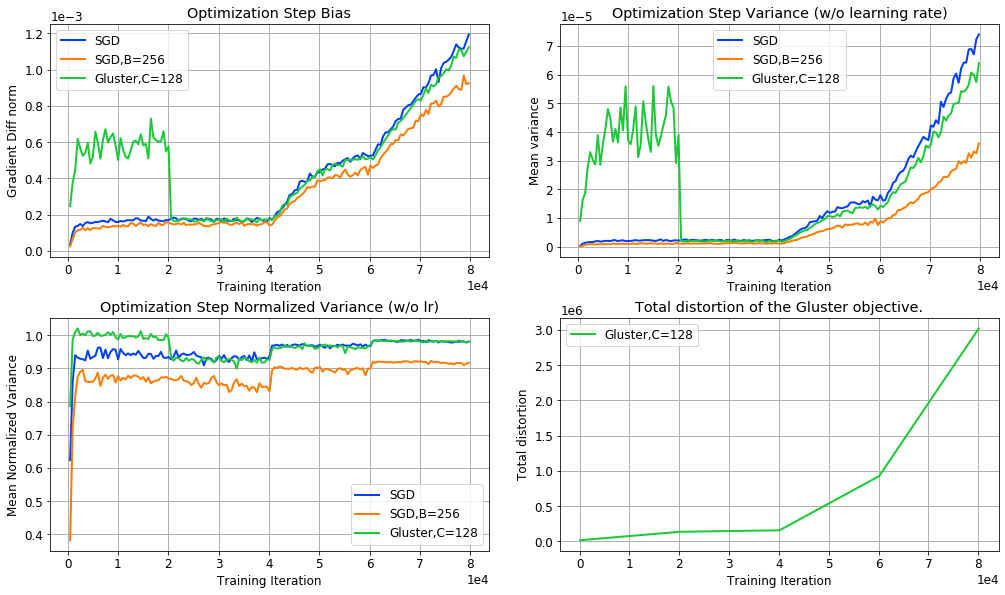

In [224]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_data/.*resnet32.*corrupt']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet32_data.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

## vgg11

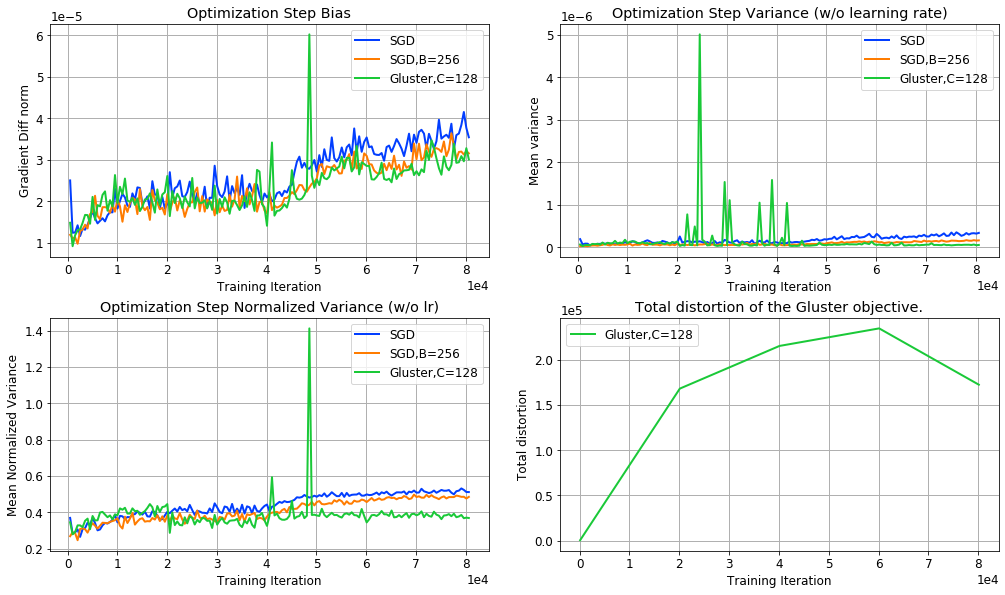

In [225]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_data/.*vgg11.*duplicate']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_vgg11_data.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

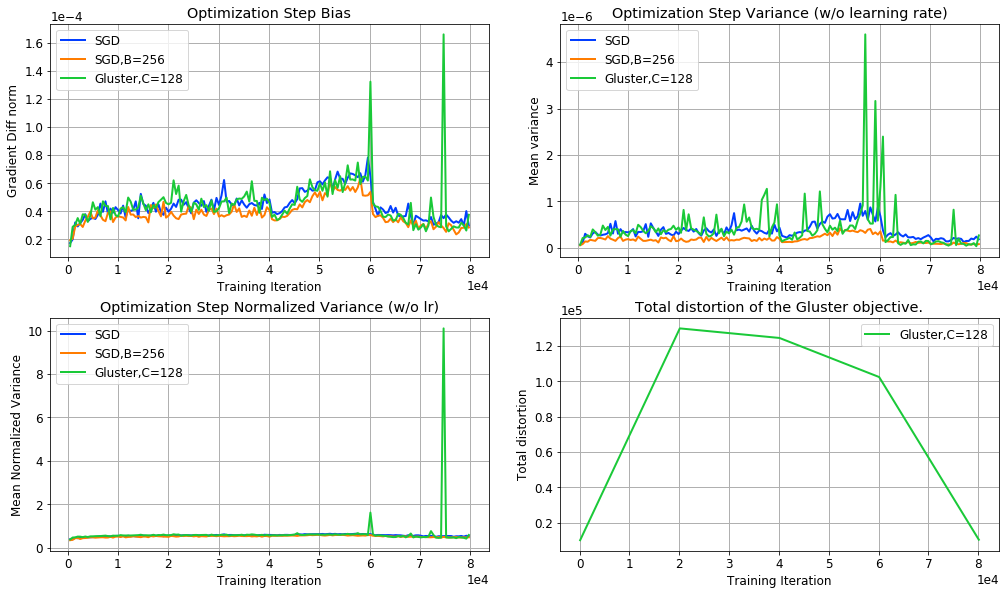

In [226]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_data/.*vgg11.*label_smoothing']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_vgg11_data.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

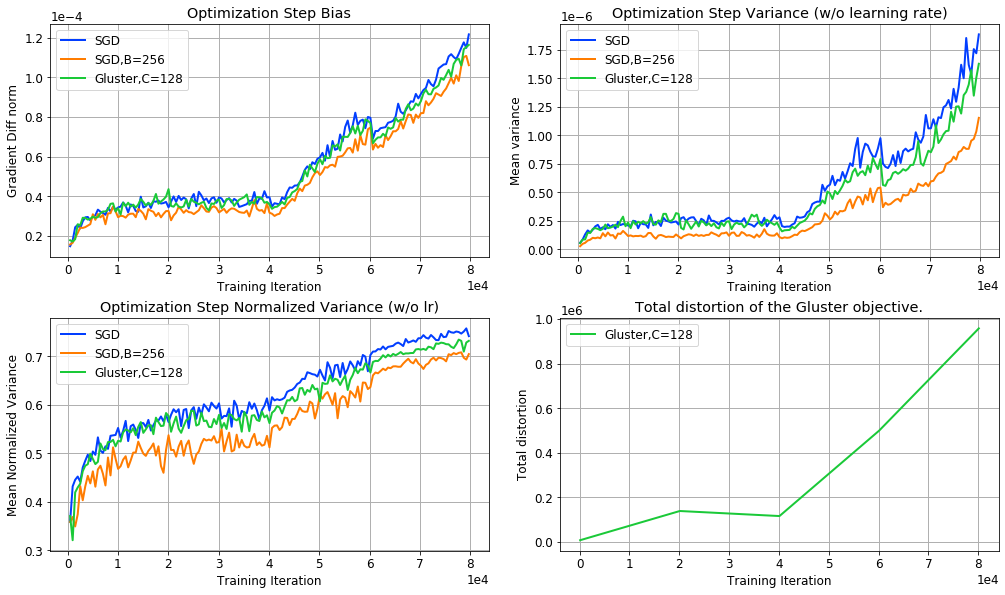

In [227]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_data/.*vgg11.*corrupt']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_vgg11_data.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

* corrupt still helps with reduction of fluctuations
* duplicates on average still make the variance of gluster lower, but there is still fluctuation
* label smoothing not at all

Try:
* corrupt + duplicates?
* combinations e.g. label smoothing + corrupt data, label smoothing + data aug
* cifar100
* online gluster
* transformer

questions:
1. how can we fix the fluctation? more data (data_aug), noisy data (label_smoothing, corrupt_data)
2. assume no fluctuation, when does gluster shine? duplicate data

answer:
1. try combinations of data_aug, label_smoothing, corrupt_data
2. try cifar100, imagenet

## Resnet8 product of data aug, label smooth, corrupt

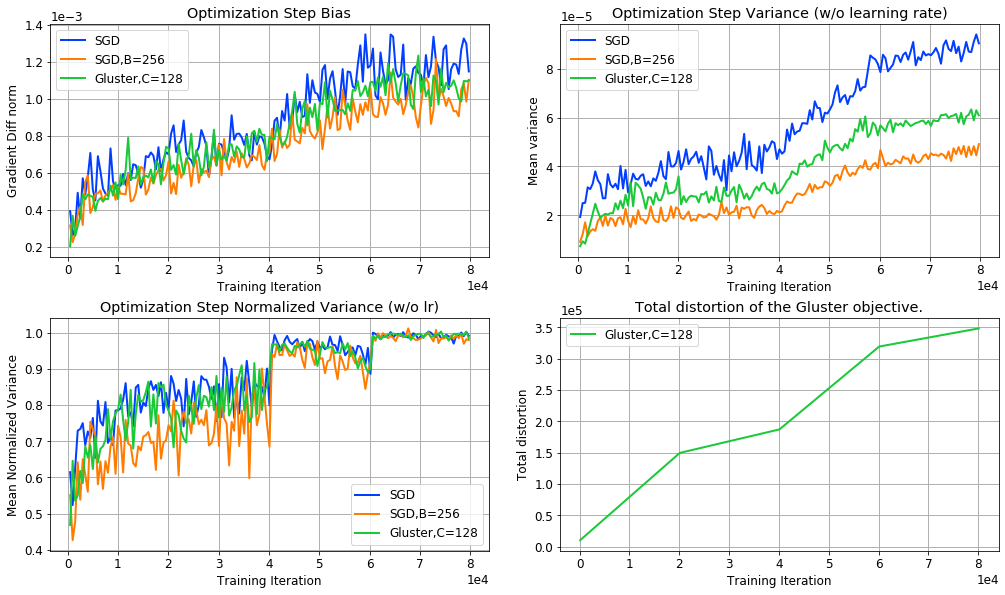

In [236]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
# patterns = ['.*runs_cifar10_gvar_resnet8_data_prod/.*label_smoothing.*data_aug.*corrupt']  # (?!.*scheduler)
# patterns = ['.*runs_cifar10_gvar_resnet8_data_prod/(?!.*label_smoothing).*data_aug.*corrupt']  # (?!.*scheduler)
# patterns = ['.*runs_cifar10_gvar_resnet8_data_prod/.*label_smoothing(?!.*data_aug).*corrupt']  # (?!.*scheduler)
# patterns = ['.*runs_cifar10_gvar_resnet8_data_prod/.*label_smoothing.*data_aug(?!.*corrupt)']  # (?!.*scheduler)
patterns = ['.*runs_cifar10_gvar_resnet8_data_prod/(?!.*label_smoothing)(?!.*data_aug).*corrupt']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet8_data_prod.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

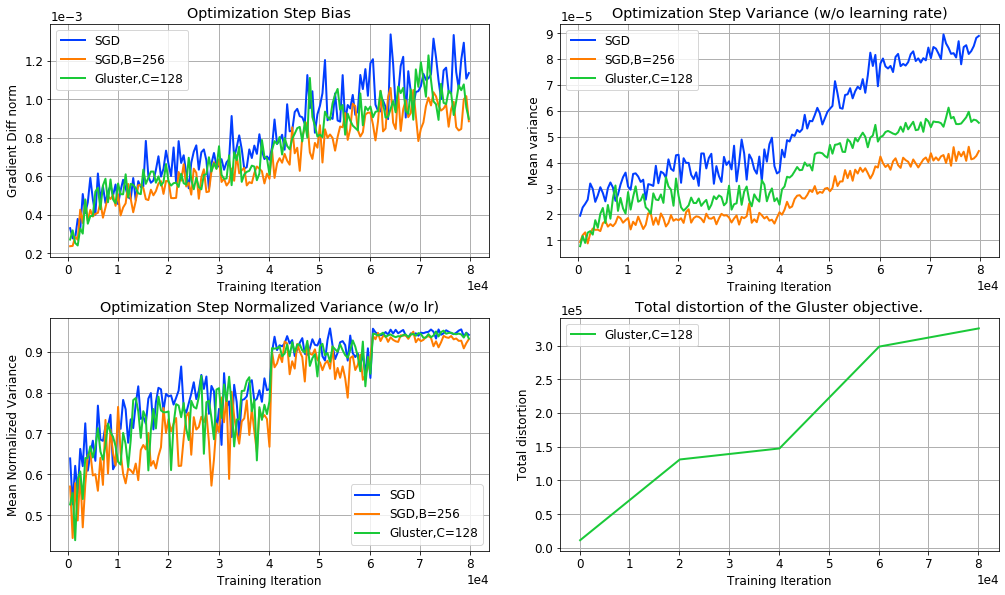

In [237]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_cifar10_gvar_resnet8_data_prod/.*label_smoothing.*data_aug.*corrupt']  # (?!.*scheduler)
# patterns = ['.*runs_cifar10_gvar_resnet8_data_prod/(?!.*label_smoothing).*data_aug.*corrupt']  # (?!.*scheduler)
# patterns = ['.*runs_cifar10_gvar_resnet8_data_prod/.*label_smoothing(?!.*data_aug).*corrupt']  # (?!.*scheduler)
# patterns = ['.*runs_cifar10_gvar_resnet8_data_prod/.*label_smoothing.*data_aug(?!.*corrupt)']  # (?!.*scheduler)
# patterns = ['.*runs_cifar10_gvar_resnet8_data_prod/(?!.*label_smoothing)(?!.*data_aug).*corrupt']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet8_data_prod.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

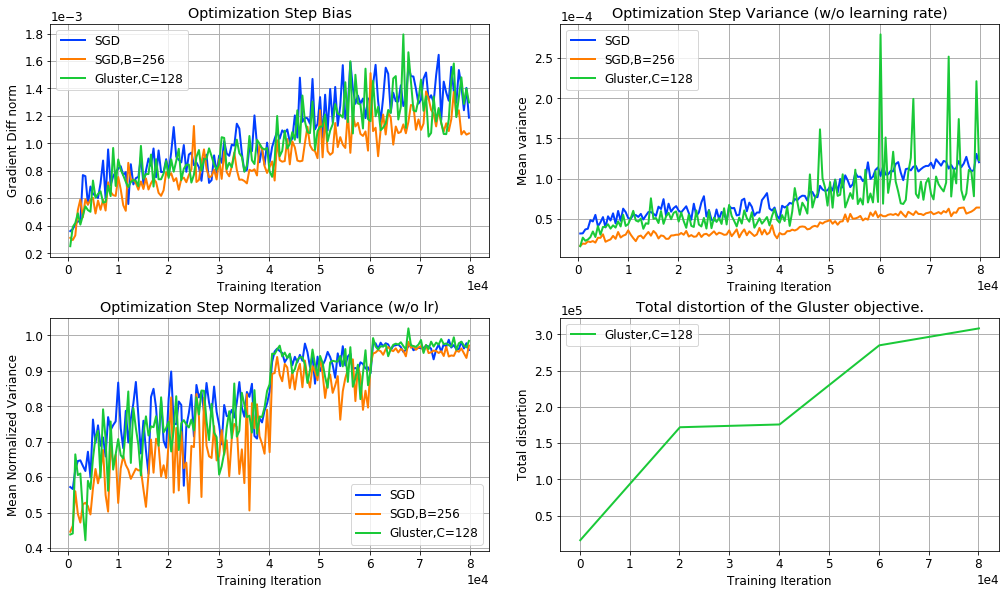

In [238]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
# patterns = ['.*runs_cifar10_gvar_resnet8_data_prod/.*label_smoothing.*data_aug.*corrupt']  # (?!.*scheduler)
# patterns = ['.*runs_cifar10_gvar_resnet8_data_prod/(?!.*label_smoothing).*data_aug.*corrupt']  # (?!.*scheduler)
# patterns = ['.*runs_cifar10_gvar_resnet8_data_prod/.*label_smoothing(?!.*data_aug).*corrupt']  # (?!.*scheduler)
patterns = ['.*runs_cifar10_gvar_resnet8_data_prod/.*label_smoothing.*data_aug(?!.*corrupt)']  # (?!.*scheduler)
# patterns = ['.*runs_cifar10_gvar_resnet8_data_prod/(?!.*label_smoothing)(?!.*data_aug).*corrupt']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet8_data_prod.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

* The main thing that fixes the fluctuations is corrupt data
* label smoothing and data_aug have little effect

* try same thing on resnet32 which is the only case where corrupt data does not completely resolve fluctuations

## Resnet32 product of data aug, label smooth, corrupt

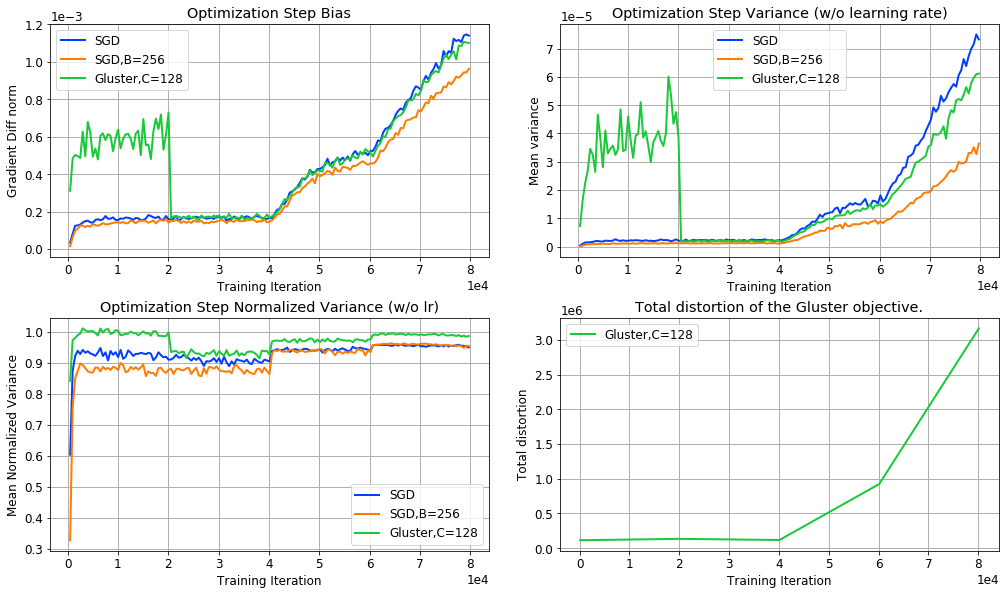

In [273]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
# patterns = ['.*runs_cifar10_gvar_resnet32_data_prod/.*label_smoothing.*data_aug.*corrupt']  # (?!.*scheduler)
# patterns = ['.*runs_cifar10_gvar_resnet32_data_prod/(?!.*label_smoothing).*data_aug.*corrupt']  # (?!.*scheduler)
# patterns = ['.*runs_cifar10_gvar_resnet32_data_prod/.*label_smoothing(?!.*data_aug).*corrupt']  # (?!.*scheduler)
# patterns = ['.*runs_cifar10_gvar_resnet32_data_prod/.*label_smoothing.*data_aug(?!.*corrupt)']  # (?!.*scheduler)
# patterns = ['.*runs_cifar10_gvar_resnet32_data_prod/(?!.*label_smoothing)(?!.*data_aug).*corrupt']  # (?!.*scheduler)
# patterns = ['.*runs_cifar10_gvar_resnet32_data_prod/(?!.*label_smoothing).*data_aug(?!.*corrupt)']  # (?!.*scheduler)
# patterns = ['.*runs_cifar10_gvar_resnet32_data_prod/.*label_smoothing(?!.*data_aug)(?!.*corrupt)']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet32_data_prod.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

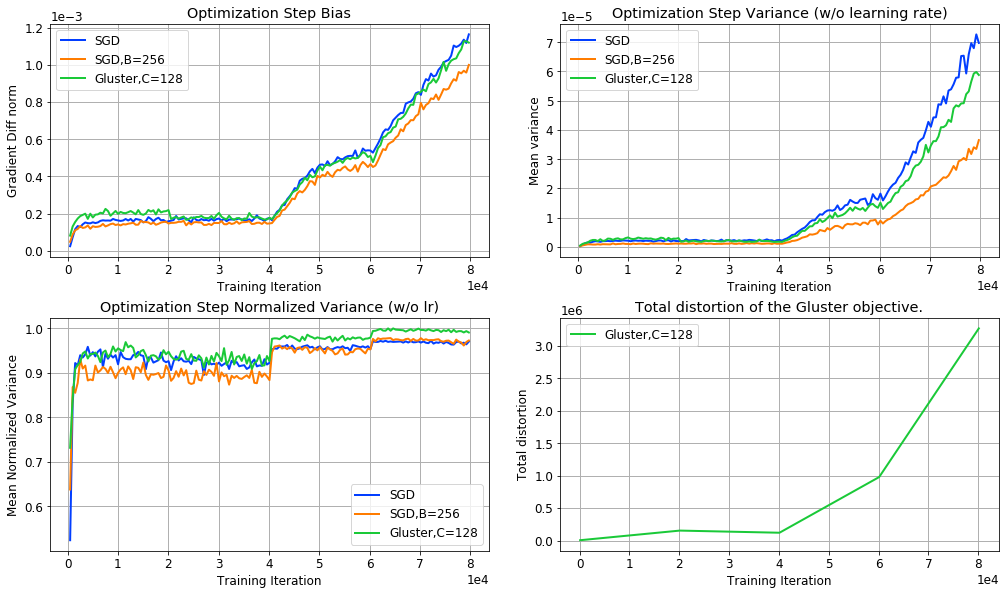

In [274]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
# patterns = ['.*runs_cifar10_gvar_resnet32_data_prod/.*label_smoothing.*data_aug.*corrupt']  # (?!.*scheduler)
# patterns = ['.*runs_cifar10_gvar_resnet32_data_prod/(?!.*label_smoothing).*data_aug.*corrupt']  # (?!.*scheduler)
patterns = ['.*runs_cifar10_gvar_resnet32_data_prod/.*label_smoothing(?!.*data_aug).*corrupt']  # (?!.*scheduler)
# patterns = ['.*runs_cifar10_gvar_resnet32_data_prod/.*label_smoothing.*data_aug(?!.*corrupt)']  # (?!.*scheduler)
# patterns = ['.*runs_cifar10_gvar_resnet32_data_prod/(?!.*label_smoothing)(?!.*data_aug).*corrupt']  # (?!.*scheduler)
# patterns = ['.*runs_cifar10_gvar_resnet32_data_prod/(?!.*label_smoothing).*data_aug(?!.*corrupt)']  # (?!.*scheduler)
# patterns = ['.*runs_cifar10_gvar_resnet32_data_prod/.*label_smoothing(?!.*data_aug)(?!.*corrupt)']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar10_resnet32_data_prod.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 5
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

* label smoothing/data_aug alone do not fix fluctuation
* corrupt alone lower variance but not at the beginning
* corrupt + label smoothing behaves nicely

questions:
1. how can we fix the fluctation? noisy data (label_smoothing, corrupt_data)
2. assume no fluctuation, when does gluster shine? duplicate data

Try:
* cifar100
* imagenet
* corrupt + duplicates?
* online gluster
* transformer

## Cifar100, Resnet32, label smooth, corrupt

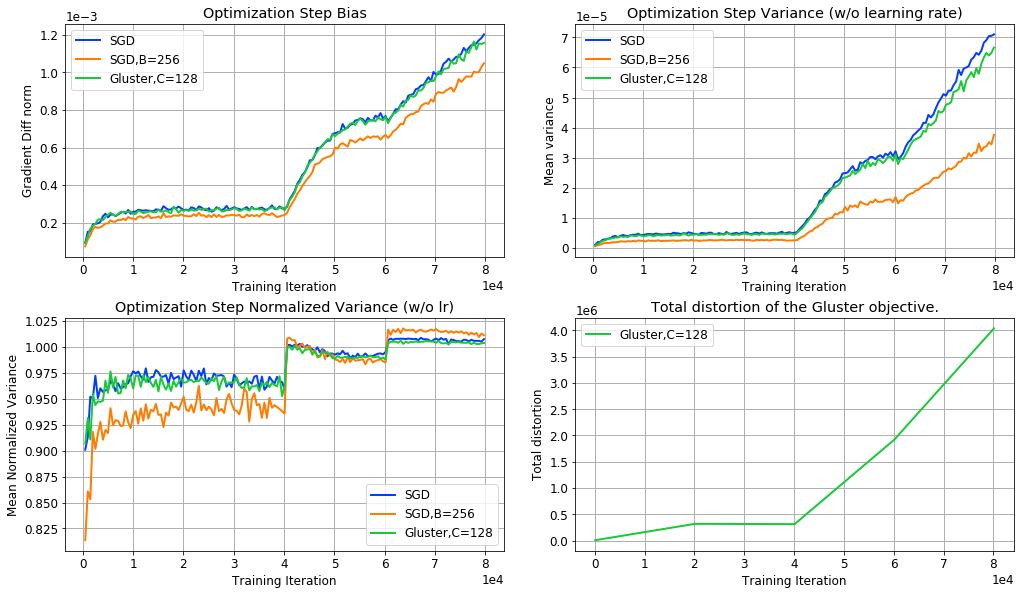

In [299]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
# patterns = ['.*runs_cifar100_gvar_resnet32_data_prod/.*label_smoothing.*corrupt']  # (?!.*scheduler)
patterns = ['.*runs_cifar100_gvar_resnet32_data_prod/(?!.*label_smoothing).*corrupt']  # (?!.*scheduler)
# patterns = ['.*runs_cifar100_gvar_resnet32_data_prod/.*label_smoothing(?!.*corrupt)']  # (?!.*scheduler)
# patterns = ['.*runs_cifar100_gvar_resnet32_data_prod/(?!.*label_smoothing)(?!.*corrupt)']  # (?!.*scheduler)
# patterns = ['.*runs_cifar100_gvar_resnet32_data_prod/(?!.*corrupt)']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar100_resnet32_data_prod.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter', 'smoothing_']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 3
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

* less fluctuations in general in cifar100
* but the variance reduction is negligible
* label smoothing helps a little bit but not fully with fluctuations, it might be an artifact of single run
* corrupt data makes gluster closer to sgd while making it smoother

questions:
1. how can we fix the fluctation? noisy data (corrupt_data)
2. assume no fluctuation, when does gluster shine? duplicate data

Try:
* corrupt + duplicates on cifar100
* imagenet
* online gluster
* transformer

## cifar100, corrupt + dup

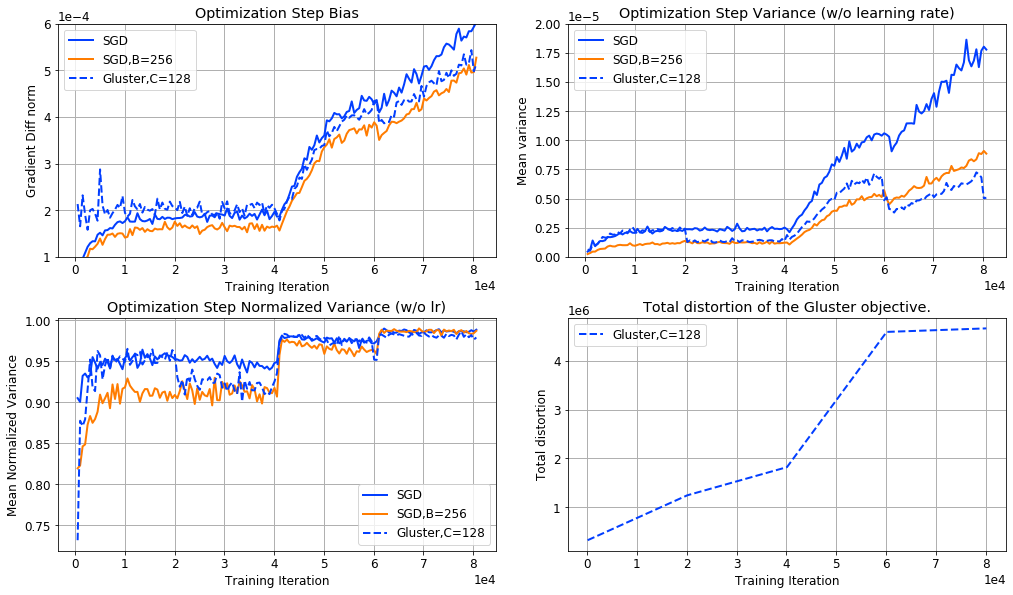

In [316]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
# patterns = ['.*runs_cifar100_gvar_resnet32_corrupt_dup/.*corrupt']  # (?!.*scheduler)
patterns = ['.*runs_cifar100_gvar_resnet32_corrupt_dup/(?!.*corrupt)']  # (?!.*scheduler)
# patterns = ['.*runs_cifar100_gvar_resnet32_corrupt_dup/.*']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/cifar100_resnet32_corrupt_dup.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter', 'perc_']  # g_estim
# ylim = [None]*20
ylim = [[1e-4, 6e-4], [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 2
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

* with duplicate data on cifar100 even clean non-corrupt data is fine, no major fluctuations and by the end the variance is lower than double batch size
* with corrupt data is also fine

Try:
* imagenet
* fashion mnist
* goptim
* rank
* online gluster
* transformer

# imagenet

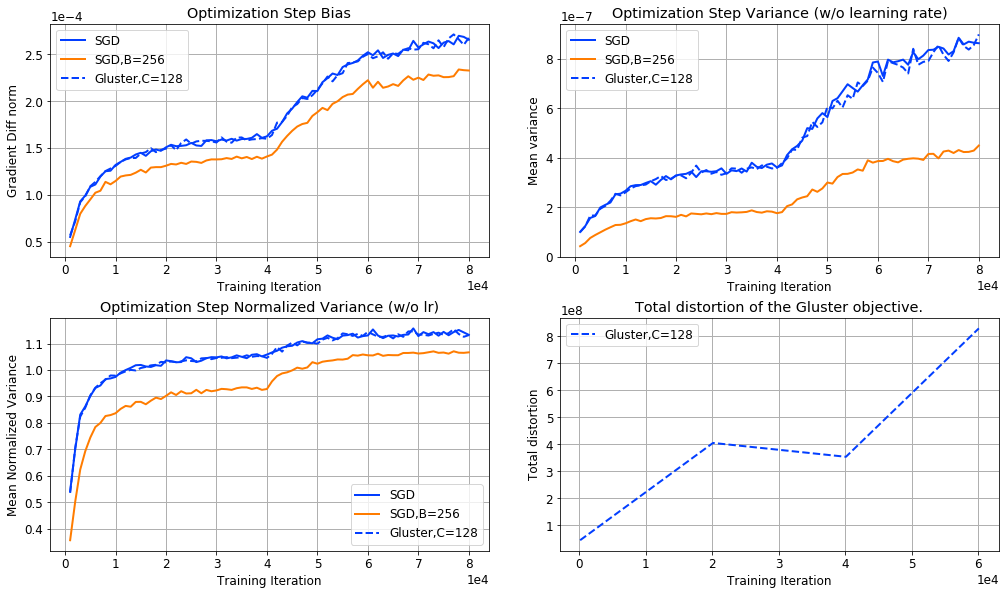

In [323]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_imagenet_gvar/(?!.*corrupt)(?!.*duplicate)']  # (?!.*scheduler)
# patterns = ['.*runs_imagenet_gvar/.*corrupt(?!.*duplicate)']  # (?!.*scheduler)
# patterns = ['.*runs_imagenet_gvar/(?!.*corrupt).*duplicate']  # (?!.*scheduler)
# patterns = ['.*runs_imagenet_gvar/.*corrupt.*duplicate']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/imagenet.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter', 'perc_']  # g_estim
ylim = [None]*20
# ylim = [[1e-4, 6e-4], [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 2
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

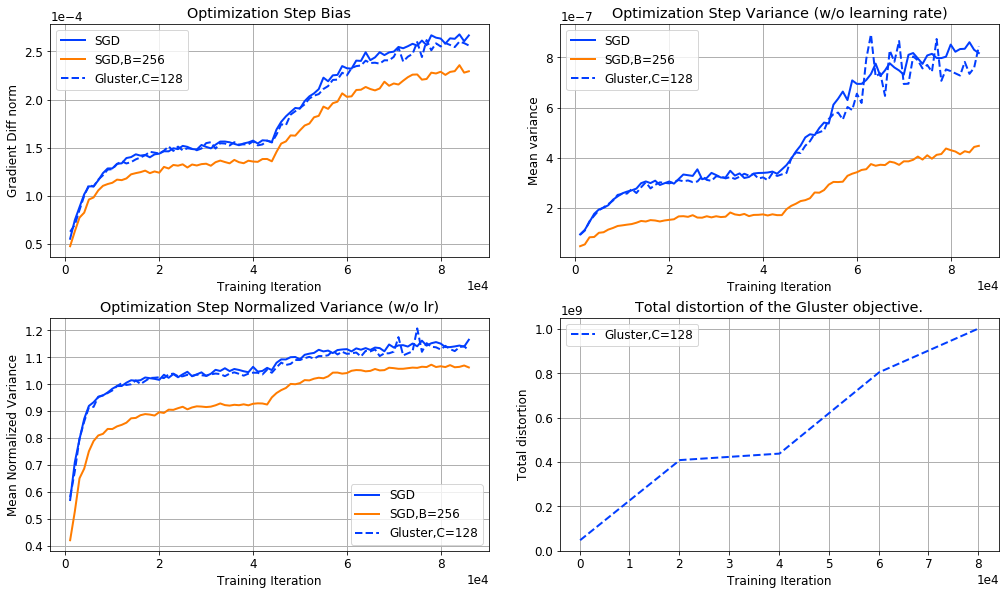

In [328]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
# patterns = ['.*runs_imagenet_gvar/(?!.*corrupt)(?!.*duplicate)']  # (?!.*scheduler)
# patterns = ['.*runs_imagenet_gvar/.*corrupt(?!.*duplicate)']  # (?!.*scheduler)
patterns = ['.*runs_imagenet_gvar/(?!.*corrupt).*duplicate']  # (?!.*scheduler)
# patterns = ['.*runs_imagenet_gvar/.*corrupt.*duplicate']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/imagenet.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter', 'perc_']  # g_estim
ylim = [None]*20
# ylim = [[1e-4, 6e-4], [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 2
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

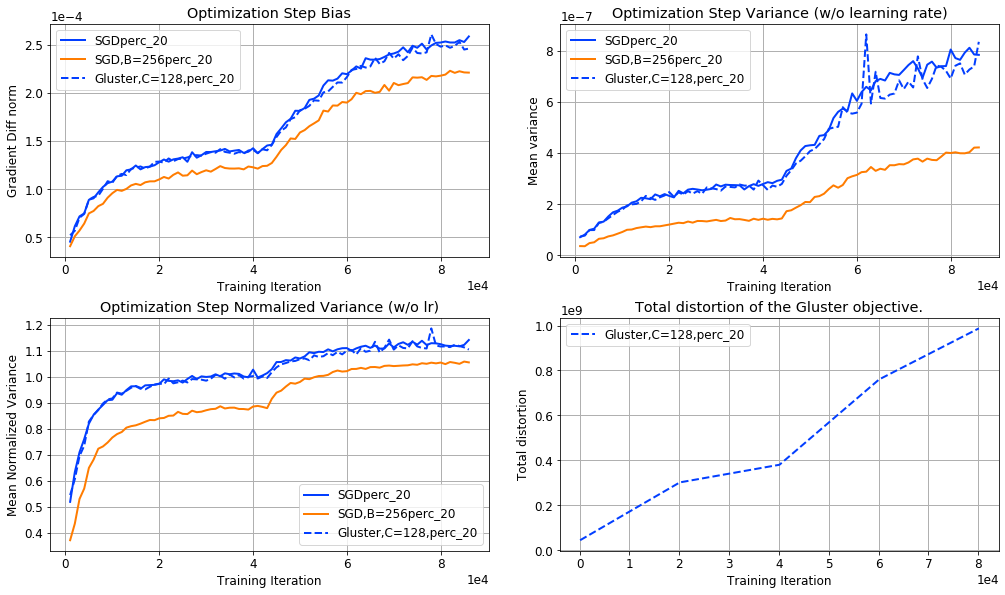

In [335]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
# patterns = ['.*runs_imagenet_gvar/(?!.*corrupt)(?!.*duplicate)']  # (?!.*scheduler)
# patterns = ['.*runs_imagenet_gvar/.*corrupt(?!.*duplicate)']  # (?!.*scheduler)
# patterns = ['.*runs_imagenet_gvar/(?!.*corrupt).*duplicate']  # (?!.*scheduler)
patterns = ['.*runs_imagenet_gvar/.*corrupt.*duplicate']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/imagenet.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size', 'g_avg', 'msnap_iter', 'perc_']  # g_estim
ylim = [None]*20
# ylim = [[1e-4, 6e-4], [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 2
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

* gluster matches sgd
  - hypothesis: gluster shines when C~=C_true, it is the same as sgd when C<<C_true, bad because of the gradient
  corelation for C>C_true
  - For C>B, think of multiple steps of GD at the same time, if gradient of clusters are uncorrelated, then
  SGD+gluster can be thought of as a large minibtach SGD that is doing coordinate descent in each step.
  - if C<<C_true, does it provide anything better than uniform sampling?
* no fluctuations without corrupt and duplicate
* +duplicate is gaining some variance reduction at the end but a bit of fluctuations as well
* corrupt+duplicate failed with out of range distortions
* cbiters was 3

try:
* imagenet
    - larger batch size
    - C>>B
    - cbiters > 3
    - bsnap_iter > 20000
* fashion mnist
* goptim
* rank
* online gluster
* transformer

## imagenet large batch

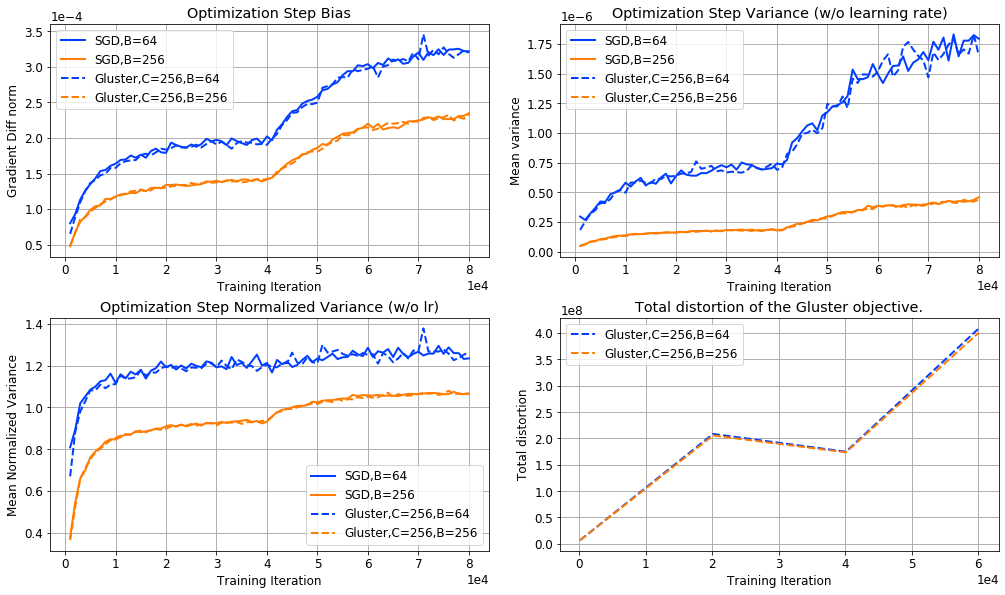

In [336]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_imagenet_gvar_large_batch/']  # (?!.*scheduler)
tag_names = ['grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2020/imagenet_large_batch.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'g_nclusters', 'batch_size']  # g_estim
ylim = [None]*20
# ylim = [[1e-4, 6e-4], [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 2
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

* large batch size: gluster on large batch size is the same as sgd, no var reduction
* C >> B: still no var reduction

try:
* plot vs C, mnist, imagenet, cifar10, compare with duplicates
* underparam imagenet model
* imagenet
    - cbiters > 3
    - bsnap_iter < 20000
* fashion mnist
* goptim
* rank
* online gluster
* transformer

run when ftime is done

# plot vs C

# mnist

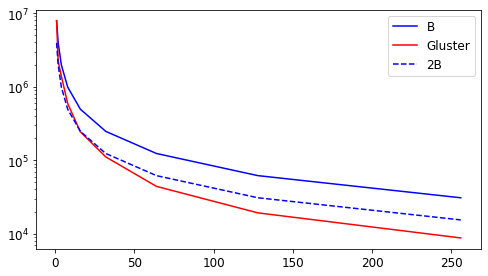

In [396]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_nclusters/.*mnist']  # (?!.*scheduler)
tag_names = ['gb_td']
fig_name = 'figs_icml2020/mnist_nclusters.png'
lg_tags = ['g_nclusters', 'duplicate']  # g_estim
ylim = [None]*20
# ylim = [[1e-4, 6e-4], [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 4
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

plt.clf()
td = [data[i]['gb_td'][1] for i in range(len(data))]
nclusters = np.power(2, np.arange(len(data)))
plt.plot(nclusters, td[0]/nclusters, label='B', c='b')
plt.plot(nclusters, td, label='Gluster', c='r')
plt.plot(nclusters, td[0]/(2*nclusters), label='2B', c='b', ls='--')
ax = plt.gca()
ax.set_yscale('log')
plt.legend()

# cifar10

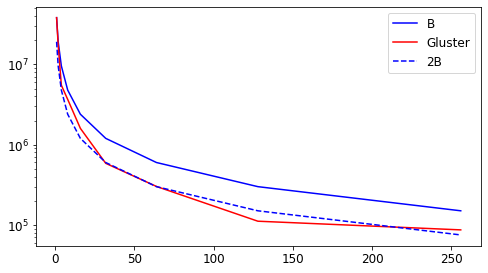

In [400]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_nclusters/.*cifar10(?!.*duplicate)']  # (?!.*scheduler)
tag_names = ['gb_td']
fig_name = 'figs_icml2020/cifar10_nclusters.png'
lg_tags = ['g_nclusters', 'duplicate']  # g_estim
ylim = [None]*20
# ylim = [[1e-4, 6e-4], [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 4
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

plt.clf()
td = [data[i]['gb_td'][1] for i in range(len(data))]
nclusters = np.power(2, np.arange(len(data)))
plt.plot(nclusters, td[0]/nclusters, label='B', c='b')
plt.plot(nclusters, td, label='Gluster', c='r')
plt.plot(nclusters, td[0]/(2*nclusters), label='2B', c='b', ls='--')
ax = plt.gca()
ax.set_yscale('log')
plt.legend()

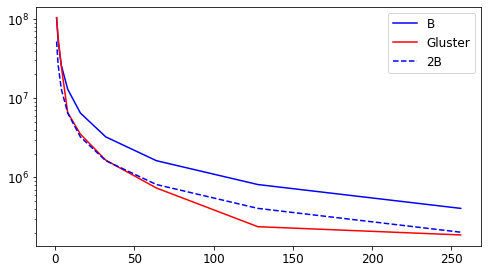

In [398]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_nclusters/.*cifar10(.*duplicate)']  # (?!.*scheduler)
tag_names = ['gb_td']
fig_name = 'figs_icml2020/cifar10_nclusters.png'
lg_tags = ['g_nclusters', 'duplicate']  # g_estim
ylim = [None]*20
# ylim = [[1e-4, 6e-4], [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 4
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

plt.clf()
td = [data[i]['gb_td'][1] for i in range(len(data))]
nclusters = np.power(2, np.arange(len(data)))
plt.plot(nclusters, td[0]/nclusters, label='B', c='b')
plt.plot(nclusters, td, label='Gluster', c='r')
plt.plot(nclusters, td[0]/(2*nclusters), label='2B', c='b', ls='--')
ax = plt.gca()
ax.set_yscale('log')
plt.legend()

# imagenet

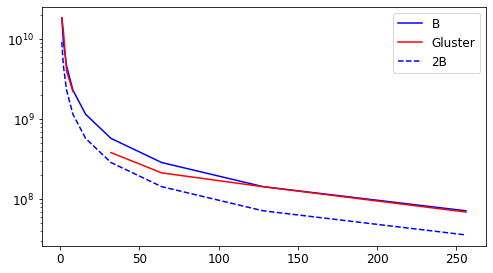

In [416]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_nclusters/.*imagenet(?!.*kahan)']  # (?!.*scheduler)
tag_names = ['gb_td']
fig_name = 'figs_icml2020/cifar10_nclusters.png'
lg_tags = ['g_nclusters', 'duplicate']  # g_estim
ylim = [None]*20
# ylim = [[1e-4, 6e-4], [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 4
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

plt.clf()
td = [data[i]['gb_td'][1] for i in range(len(data))]
nclusters = np.power(2, np.arange(len(data)))
plt.plot(nclusters, td[0]/nclusters, label='B', c='b')
plt.plot(nclusters, td, label='Gluster', c='r')
plt.plot(nclusters, td[0]/(2*nclusters), label='2B', c='b', ls='--')
ax = plt.gca()
ax.set_yscale('log')
plt.legend()

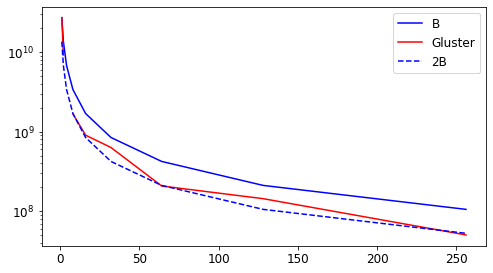

In [428]:
get_data_f = get_data_pth
plot_f = plt.plot
# plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_nclusters/.*imagenet(.*kahan)']  # (?!.*scheduler)
tag_names = ['gb_td']
fig_name = 'figs_icml2020/cifar10_nclusters.png'
lg_tags = ['g_nclusters', 'duplicate']  # g_estim
ylim = [None]*20
# ylim = [[1e-4, 6e-4], [0, 2e-5], None, None, None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 4
no_title = False
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B='), (',B=128', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

plt.clf()

td = [data[i]['gb_td'][1] for i in range(len(data))]
nclusters = np.power(2, np.arange(len(data)))
plt.plot(nclusters, td[0]/nclusters, label='B', c='b')
plt.plot(nclusters, td, label='Gluster', c='r')
plt.plot(nclusters, td[0]/(2*nclusters), label='2B', c='b', ls='--')
ax = plt.gca()
ax.set_yscale('log')
plt.legend()

imagenet
* kahan sum helps in imagenet, the curves now overlap with 1/C

TODO:
- do uniform and mixture of gaussians
- nans in imagenet, C=4, kahan sum